In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/filter/en/filtered_data0604.csv")

nodes = pd.read_csv("data/gephi files/all_nodes0604.csv")
edges = pd.read_csv("data/gephi files/all_edges0604.csv")

users = pd.read_csv("data/other/username_id_all.csv")

# investigating

In [7]:
df.columns

Index(['created_at', 'id', 'author_id', 'conversation_id', 'reply_settings',
       'text', 'lang', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'possibly_sensitive',
       'referenced_tweets.id', 'referenced_tweets.type', 'in_reply_to_user_id',
       'user.public_metrics.followers_count',
       'user.public_metrics.following_count',
       'user.public_metrics.tweet_count', 'user.public_metrics.listed_count',
       'user.url', 'user.id', 'user.username', 'user.profile_image_url',
       'user.created_at', 'user.location', 'user.description', 'day', 'count'],
      dtype='object')

In [15]:
users.loc[users["usernames_target"] == "afp"]

,usernames_target,user.id
9278,afp,380648579


In [29]:
df.loc[df["text"].str.lower().str.contains("#onenile")]

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.public_metrics.listed_count,user.url,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description,day,count
4,2020-01-03T16:07:04.000Z,1213129661489860611,172280127,1213129661489860611,everyone,Curbs to press freedoms and data gaps are stif...,en,3,0,0,...,1336,https://t.co/drNPf6rHsg,172280127,SciDevNet,https://pbs.twimg.com/profile_images/471586543...,2010-07-29T09:28:29.000Z,"Wallingford, Oxfordhsire",Bringing #science and #globaldev together thro...,2020-01-03,11
16582,2020-07-15T06:04:00.000Z,1283281138564227076,864108226207514625,1283281138564227076,everyone,Today is #WorldYouthSkillsDay. Watch how #ENTR...,en,16,0,15,...,3,NaN,864108226207514625,ErwinDeNys1,https://pbs.twimg.com/profile_images/125335182...,2017-05-15T13:20:30.000Z,Washington DC,"Manager, Climate Change Funds @ World Bank. Pa...",2020-07-15,744
17076,2020-07-17T15:30:50.000Z,1284148565372215298,807322453135474688,1284148565372215298,everyone,How is #CIWAprogram helping use #YouthSkills ...,en,1,0,4,...,84,https://t.co/XMjZj8L8MO,807322453135474688,Ede_WBG,https://pbs.twimg.com/profile_images/824071751...,2016-12-09T20:34:07.000Z,"Washington, DC","Former Sr. leader Sustainable development, Inf...",2020-07-17,316
75086,2021-05-13T07:19:38.000Z,1392741307127406593,293971992,1392741307127406593,everyone,The Nile Basin Initiative wishes our brothers ...,en,0,0,4,...,25,https://t.co/polK8H2810,293971992,nbiweb,https://pbs.twimg.com/profile_images/122459554...,2011-05-06T09:20:20.000Z,NaN,The Nile Basin Initiative (NBI) is a regional ...,2021-05-13,125
101194,2021-08-11T08:07:34.000Z,1425368277950386178,293971992,1425368277950386178,everyone,#Happeningnow Day 3: Technical progress report...,en,2,0,8,...,25,https://t.co/polK8H2810,293971992,nbiweb,https://pbs.twimg.com/profile_images/122459554...,2011-05-06T09:20:20.000Z,NaN,The Nile Basin Initiative (NBI) is a regional ...,2021-08-11,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158020,2018-05-16T15:26:13.000Z,996773824740954112,2400492211,966344915402846209,everyone,"@nbiweb : """"#Ethiopia #Egypt #Sudan agree to s...",en,0,2,1,...,520,http://t.co/V5uHnZdANe,2400492211,Mohammed222022,https://pbs.twimg.com/profile_images/142610318...,2014-03-20T21:40:49.000Z,SCOTLAND,ADAMCO HOLDING CORPORATION,2018-05-16,41
158024,2018-05-16T12:48:22.000Z,996734098294099968,293971992,996734098294099968,everyone,#Ethiopia #Egypt #Sudan agree to study filling...,en,6,0,6,...,25,https://t.co/polK8H2810,293971992,nbiweb,https://pbs.twimg.com/profile_images/122459554...,2011-05-06T09:20:20.000Z,NaN,The Nile Basin Initiative (NBI) is a regional ...,2018-05-16,41
160698,2019-07-09T12:45:12.000Z,1148573817545138176,237792794,1148573817545138176,everyone,"#Uganda Cabinet on Monday 8th July 2019, at ...",en,9,1,31,...,38,https://t.co/cO2zdipMqY,237792794,ZerihunZAY,https://pbs.twimg.com/profile_images/162408567...,2011-01-13T17:00:34.000Z,"Addis Ababa, Ethiopia",#ኢትዮጵያ! #Ethiopia \r\n'ሁሉን መርምሩ፣ መልካሙን ያዙ!'\r\...,2019-07-09,24
161787,2019-11-28T12:55:14.000Z,1200035420542767106,2534446580,1200035420542767106,everyone,Check out this article: Kenya to chair Nile Co...,en,0,0,0,...,0,NaN,2534446580,benwarutumo,https://abs.twimg.com/sticky/default_profile_i...,2014-05-30T07:26:17.000Z,NaN,NaN,2019-11-28,24


# graphs for individual hashtags (frequency of use)

In [23]:
hashtag = "#abiyistheman"

df1 = df.loc[df["text"].str.lower().str.contains(hashtag)]

df1.tail()

,created_at,id,author_id,conversation_id,reply_settings,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,...,user.public_metrics.listed_count,user.url,user.id,user.username,user.profile_image_url,user.created_at,user.location,user.description,day,count
111606,2021-11-24T03:41:32.000Z,1463352056564092929,1440199642025582595,1463352056564092929,everyone,PM Abiy had a choice. He could have obeyed the...,en,0,0,0,...,0,NaN,1440199642025582595,GudetaTesema1,https://pbs.twimg.com/profile_images/159318584...,2021-09-21T06:22:47.000Z,NaN,NaN,2021-11-24,257
111607,2021-11-24T03:41:07.000Z,1463351951115096075,1440199642025582595,1463351951115096075,everyone,PM Abiy had a choice. He could have obeyed the...,en,0,0,0,...,0,NaN,1440199642025582595,GudetaTesema1,https://pbs.twimg.com/profile_images/159318584...,2021-09-21T06:22:47.000Z,NaN,NaN,2021-11-24,257
111608,2021-11-24T03:40:44.000Z,1463351853014466562,1440199642025582595,1463351853014466562,everyone,PM Abiy had a choice. He could have obeyed the...,en,0,0,0,...,0,NaN,1440199642025582595,GudetaTesema1,https://pbs.twimg.com/profile_images/159318584...,2021-09-21T06:22:47.000Z,NaN,NaN,2021-11-24,257
111609,2021-11-24T03:40:28.000Z,1463351788719988742,1440199642025582595,1463351788719988742,everyone,PM Abiy had a choice. He could have obeyed the...,en,0,0,0,...,0,NaN,1440199642025582595,GudetaTesema1,https://pbs.twimg.com/profile_images/159318584...,2021-09-21T06:22:47.000Z,NaN,NaN,2021-11-24,257
111730,2021-11-26T10:15:08.000Z,1464175882071941121,1447736882171940864,1464100341511770149,everyone,@BilleneSeyoum PM Abiy had a choice. He could ...,en,0,0,0,...,1,NaN,1447736882171940864,MeskeremAbebaw4,https://pbs.twimg.com/profile_images/146441429...,2021-10-12T01:32:49.000Z,NaN,NaN,2021-11-26,45


In [5]:
df1 = df1.reset_index(drop=True)

months = []

for i in range(len(df1)):
    months.append(df1.at[i, "created_at"][:7])

df1["month"] = months

In [6]:
df1.head(10)["text"].to_list()

In [7]:
len(df1)

79

## single hashtag

Text(0.5, 1.0, 'Number of tweets using a hashtag per month 2011-2022')

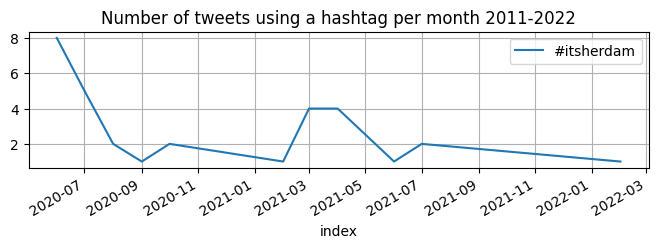

In [5]:
# making a graph for one hashtag (fillthedam)

hashtag = "#itsherdam"
df1 = df.loc[df["text"].str.lower().str.contains(hashtag)]
df1 = df1.reset_index(drop=True)

months = []
for i in range(len(df1)):
    months.append(df1.at[i, "created_at"][:7])
df1["month"] = months

plot_months = pd.DataFrame(df1["month"].value_counts()).reset_index()
plot_months["index"] = pd.to_datetime(plot_months["index"], format="%Y-%m")
plot_months = plot_months.sort_values("index")
plot_months = plot_months.set_index("index").rename(columns={"month":hashtag})
plot_months

plot_months.plot.line(grid=True, figsize=(8, 2))
plt.title("Number of tweets using a hashtag per month 2011-2022")

#plt.savefig("pics/en filter/filtered_hashtag_tweetspermonth1104.png")

In [9]:
# some functions

# adds "month" column to database df, timestamp is in df in column "created_at"

def month_column(df):
    months = []
    for i in range(len(df)):
        months.append(df.at[i, "created_at"][:7])
    df["month"] = months
    return df

# adds the valuescounts of a specific hashtag for each month, months listed in plot_months "index"

def add_valuecounts(df, plot_months, hashtag):
    new = df["month"].value_counts().reset_index().copy()
    plot_months["index"] = pd.to_datetime(plot_months["index"], format="%Y-%m")
    plot_months = plot_months.sort_values("index")
    plot_months = plot_months.set_index("index").rename(columns={"month":hashtag})
    return plot_months

## all hashtags

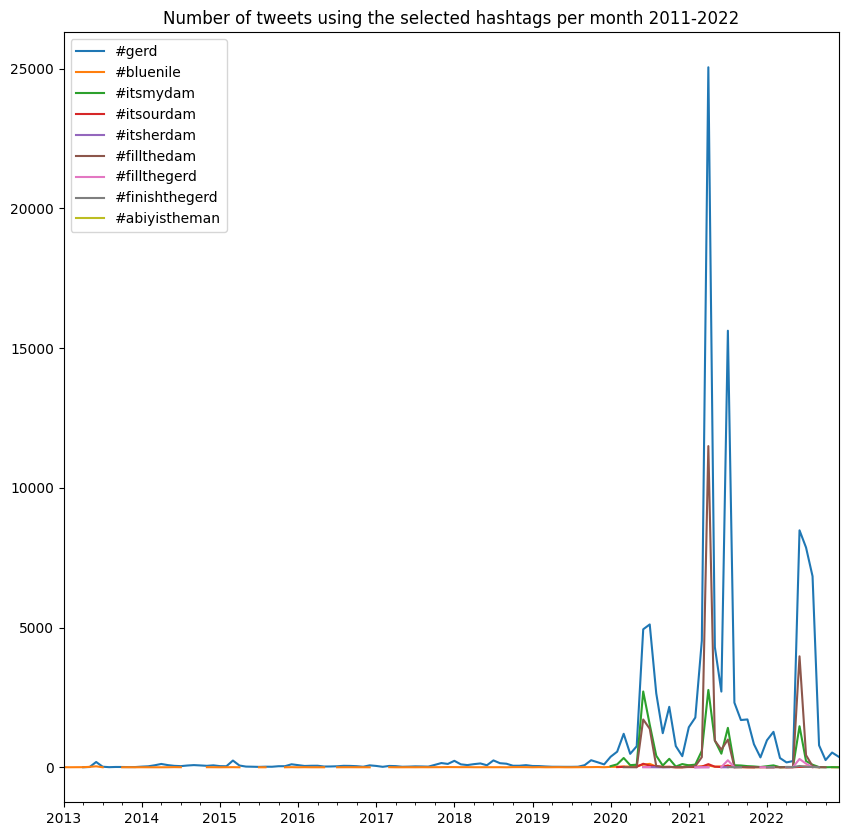

In [14]:
# making a line graph with all 10 hashtags

h1 = "#gerd"
df1 = df.loc[df["text"].str.lower().str.contains(h1)]
df1 = df1.reset_index(drop=True)

months = []
for i in range(len(df1)):
    months.append(df1.at[i, "created_at"][:7])
df1["month"] = months

plot_months = pd.DataFrame(df1["month"].value_counts()).reset_index()
plot_months["index"] = pd.to_datetime(plot_months["index"], format="%Y-%m")
plot_months = plot_months.sort_values("index")
plot_months = plot_months.set_index("index").rename(columns={"month":h1})

h = ["#bluenile", "#itsmydam", "#itsourdam", "#itsherdam", "#fillthedam", "#fillthegerd", "#finishthegerd", "#abiyistheman"]

for item in h:
    df2 = df.loc[df["text"].str.lower().str.contains(item)].reset_index(drop=True).copy()
    months = []
    for i in range(len(df2)):
        months.append(df2.at[i, "created_at"][:7])
    df2["month"] = months
    
    # separate dataframe for the single hashtag
    plot_months2 = pd.DataFrame(df2["month"].value_counts()).reset_index().copy()
    plot_months2["index"] = pd.to_datetime(plot_months2["index"], format="%Y-%m")
    plot_months2 = plot_months2.sort_values("index").copy()
    plot_months2 = plot_months2.set_index("index").rename(columns={"month":item}).copy()
    
    # adding information to original plot_months
    plot_months = pd.merge(plot_months, plot_months2, how="outer", left_index=True, right_index=True).copy()


pic = plot_months.plot.line(figsize=(10, 10))
plt.title("Number of tweets using the selected hashtags per month 2011-2022")
pic.set(xlabel="")

plt.savefig("pics/en filter/filtered_by_hashtags240523.png")

# user's positions 